<a href="https://colab.research.google.com/github/Navyakovvuri/Video_games_sales/blob/main/Video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all libraries

Imported all the Required Libraries.

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd

import scipy
from scipy.stats.stats import pearsonr
import seaborn as sns

#Introducing the video games sales dataset



#Acquire the data



*   For this exercise, I elected to use data from https://data.world/sumitrock/video-games-sales and then modified it.




In [ ]:
data_path ="https://docs.google.com/spreadsheets/d/e/2PACX-1vTR3yIhNlKEzQ_CGZzFQHLhrA_pn0vJ58BtZnlcaB-lwPW30lsYQL3squw7PNboEHYYeDu1gZ-CHSdZ/pub?gid=1326630692&single=true&output=csv"
vgs = pd.read_csv(data_path)
vgs.shape

(16719, 16)

In [ ]:
vgs.head()

,Name,Platform,Year_of_release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vgs.tail()

,Name,Platform,Year_of_release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


**Data** **Set** **information**: 

This research aimed at video games sales data all over the world.


**Features Description:**

*   Name: Name of the game

*   Platform: console on which the game is running

*   Genre: Game's category

*   Publisher: A company that publishes video games

*   NA_Sales: Game sales in North America (in millions of units)

*   EU_Sales: Game sales in European Union (in millions of units)

*   JP_Sales: Game sales in Japan (in millions of units)

*   Other_Sales: Game sales in the rest of the world (excluding Japan,  European Union, North America (in millions of units))

*   Global_Sales: Total sales all over the world (in millions of units)

*  Critic_Score: Aggregate score compiled by Metacritic staff 

*  Critic_Count: The number of critics used in coming up with the Critic_score

*  User_Score: Score by Metacritic’s subscribers

*  Developer: Party responsible for creating the game

*  Rating: The ESRB ratings (Entertainment Software Rating Board)

Now let’s take a look at what those ratings means:

E: Everyone can play it

M: Mature 17+

T: For Teens

K-A: Kids to Adults

AO: Adults Only

RP: Ratings are Pending

E10+: Age of 10+ can play
























#Perform light manipulations



* **vgs.info()** displays the type of values each column in dataset like if the column has float, int, object values,etc.

In [ ]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


* **isnull()** is used to findout whether there are any Nan values in the dataset.

In [ ]:
vgs.isnull().any()

Name                True
Platform           False
Year_of_release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

* **isna().sum()** counts the number of Nan values in each column.

In [ ]:
vgs.isna().sum()

Name                  2
Platform              0
Year_of_release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

* In below code **dropna** is used to drop the Nan values in the dataset.

In [ ]:
vgs.dropna(axis=0,inplace=True) 
vgs.head()

,Name,Platform,Year_of_release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
vgs.tail()

,Name,Platform,Year_of_release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.0,0.0,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.0,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


Deleting unnecessary variables:

* I am not going to use "User_score", "User_count", "Critic_count" variables in this data set. So i am dropping these variables from the data set using the **drop** function.


*  In this function, the **axis** parameter determines whether it will be a row or a column. If we set "axis = 1", the column will be deleted.


* **inplace** is set to True because it will automatically save the changes in the data set.






In [ ]:
vgs.drop(["User_Score","User_Count","Critic_Count"],axis=1,inplace=True)
vgs.head()

,Name,Platform,Year_of_release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo,E



* In the above output, i observed that all the numerical values are in float. 
so, now by using **astype** i changed the data type. 



In [ ]:
vgs["Year_of_release"]=vgs["Year_of_release"].astype("int")
vgs['Critic_Score']=vgs['Critic_Score'].astype("int")
vgs.head()

,Name,Platform,Year_of_release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,Nintendo,E


#Explore Numerical features

* Here i created a new variable named Sale_features and assigned all the sales columns to it.

In [ ]:
Sale_features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

Numerical_features = ['Critic_Score'] + Sale_features

In [ ]:
Numerical_features

['Critic_Score',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

* **describe()** gives us a statistical overview of columns containing numerical values.

In [ ]:
vgs[Numerical_features].describe()

,Critic_Score,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,70.272088,0.394484,0.236089,0.064158,0.082677,0.777590
std,13.868572,0.967385,0.687330,0.287570,0.269871,1.963443
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,62.000000,0.060000,0.020000,0.000000,0.010000,0.110000
50%,72.000000,0.150000,0.060000,0.000000,0.020000,0.290000
75%,80.000000,0.390000,0.210000,0.010000,0.070000,0.750000
max,98.000000,41.360000,28.960000,6.500000,10.570000,82.530000


In [ ]:
vgs[Numerical_features].describe().round()

,Critic_Score,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,6825.0,6825.0,6825.0,6825.0,6825.0,6825.0
mean,70.0,0.0,0.0,0.0,0.0,1.0
std,14.0,1.0,1.0,0.0,0.0,2.0
min,13.0,0.0,0.0,0.0,0.0,0.0
25%,62.0,0.0,0.0,0.0,0.0,0.0
50%,72.0,0.0,0.0,0.0,0.0,0.0
75%,80.0,0.0,0.0,0.0,0.0,1.0
max,98.0,41.0,29.0,6.0,11.0,83.0


* Calculated the mean for Global sales.

In [ ]:
vgs['Global_Sales'].mean()

0.777589743589759


*   Calculated the sum of sales for Ubisoft and Electronic Arts.
*   Looks like Electronic Arts dominates over Ubisoft in all the regions in terms of sales.




In [ ]:
UB= (vgs['Publisher']=='Ubisoft')
EA = (vgs['Publisher']=='Electronic Arts')

In [ ]:
print(vgs['JP_Sales'][UB].sum())
print(vgs['EU_Sales'][UB].sum())
print(vgs['NA_Sales'][UB].sum())
print(vgs['Other_Sales'][UB].sum())
print(vgs['Global_Sales'][UB].sum())


6.41
121.28000000000002
174.92
37.589999999999996
340.23


In [ ]:
print(vgs['JP_Sales'][EA].sum())
print(vgs['EU_Sales'][EA].sum())
print(vgs['NA_Sales'][EA].sum())
print(vgs['Other_Sales'][EA].sum())
print(vgs['Global_Sales'][EA].sum())

10.85
289.24
465.45000000000005
102.92
868.5500000000001


Below were the top 4 games according to the critic score.

In [ ]:
filter = (vgs['Critic_Score'] == vgs['Critic_Score'].max())
vgs['Name'][filter]

51           Grand Theft Auto IV
57           Grand Theft Auto IV
227     Tony Hawk's Pro Skater 2
5350                 SoulCalibur
Name: Name, dtype: object

* calculated which game has more sales according to the data.
* Looks like wii Sports game rules the market in global sales.

In [ ]:
filter1 = (vgs['Global_Sales']==vgs['Global_Sales'].max())
vgs['Name'][filter1]

0    Wii Sports
Name: Name, dtype: object

Minimum sales in each year






In [ ]:
release_sales=vgs.groupby("Year_of_release")["Global_Sales","Name"].min()
release_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Global_Sales,Name
Year_of_release,,
1985,0.03,Alter Ego
1988,0.03,SimCity
1992,0.03,Doom
1994,1.27,Battle Arena Toshinden
1996,0.14,Diablo
1997,0.07,Ace Combat 2
1998,0.02,Bomberman Party Edition
1999,0.02,Age of Empires II: The Age of Kings
2000,0.01,007 Racing


* Pearson correlation coefficient

* NA_Sales and EU_Sales has strong positive correlationship

In [ ]:
NA_Sales= vgs['NA_Sales']
JP_Sales= vgs['JP_Sales']
EU_Sales= vgs['EU_Sales']
Other_Sales=vgs['Other_Sales']

pearsonr_coefficient,p_value=pearsonr(NA_Sales,JP_Sales)
print('pearsonr Correlation coefficient%0.3f'% (pearsonr_coefficient))

pearsonr Correlation coefficient0.469


In [ ]:
pearsonr_coefficient,p_value=pearsonr(NA_Sales,EU_Sales)
print('pearsonr Correlation coefficient%0.3f'% (pearsonr_coefficient))

pearsonr Correlation coefficient0.842


In [ ]:
pearsonr_coefficient,p_value=pearsonr(NA_Sales,Other_Sales)
print('pearsonr Correlation coefficient%0.3f'% (pearsonr_coefficient))

pearsonr Correlation coefficient0.727


# Low variance features

* Developer doesn't make much difference in sales.

In [ ]:
vgs['Developer'].value_counts()

EA Canada             149
EA Sports             142
Capcom                126
Ubisoft               103
Konami                 95
                     ... 
Tomy Corporation        1
Empire Interactive      1
ImaginEngine            1
Crafts & Meister        1
TDK Mediactive          1
Name: Developer, Length: 1289, dtype: int64

#A brief introduction to Quantitative Feature Engineering

It is clear from the output that Electronic Arts publishes more video games.

In [ ]:
publishers=pd.DataFrame(vgs.Publisher.value_counts()) 
publishers.head(10)

,Publisher
Electronic Arts,944
Ubisoft,496
Activision,492
Sony Computer Entertainment,316
THQ,307
Nintendo,291
Sega,284
Take-Two Interactive,273
Konami Digital Entertainment,244
Namco Bandai Games,239


# Graphical proportion

#Count plots using seaborn


This output shows Action catogery games are highly developed.

Text(0.5, 1.0, 'Games count by Genre ')

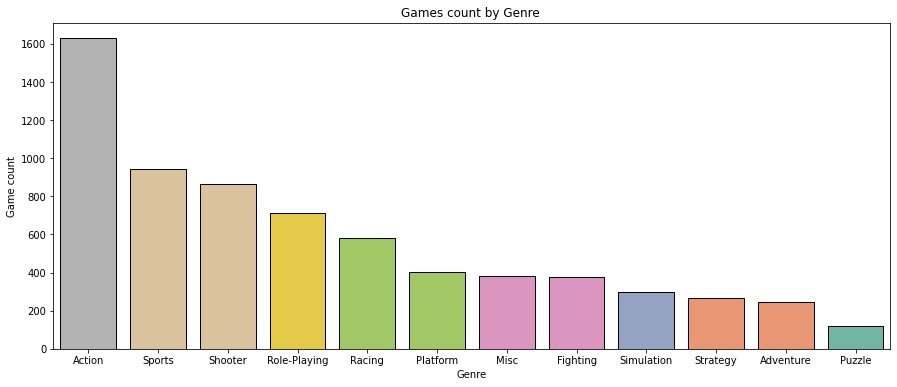

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=vgs,x="Genre",order=vgs.Genre.value_counts().index, palette="Set2_r",edgecolor="black")
plt.ylabel("Game count")
plt.title("Games count by Genre ")


*   Below code is useful to findout how many games belongs to each rating category.
*   By looking at the output it is clear that there are more teenager games.




Text(0, 0.5, 'Game count')

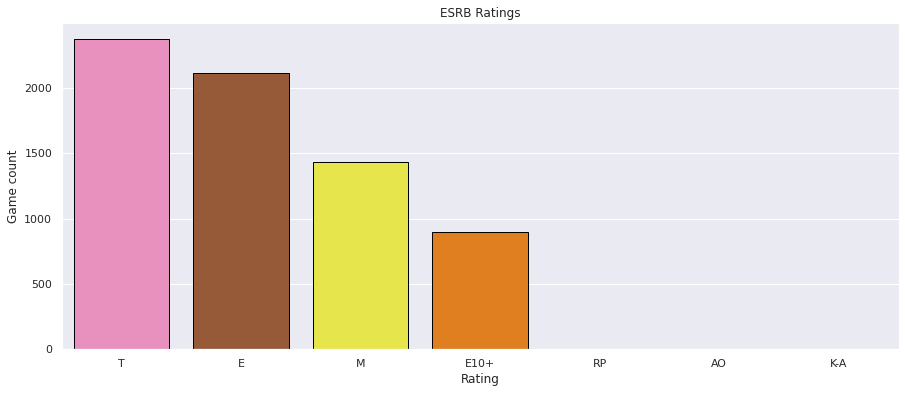

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))
sns.countplot(data=vgs,x="Rating",order=vgs.Rating.value_counts().index, palette="Set1_r",edgecolor="black")
plt.title("ESRB Ratings")
plt.ylabel("Game count")

#Barplots using seaborn

* Below code is helpful to findout how many games were running in each platform.

* Looks like more games are running in Wii console.

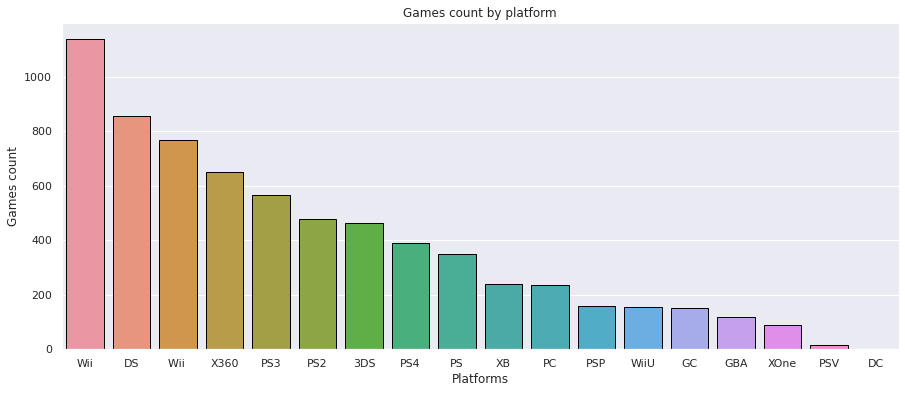

In [ ]:
x=vgs.Platform.unique()
y=vgs.Platform.value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y,edgecolor="black")
plt.xlabel("Platforms")
plt.ylabel("Games count")
plt.title("Games count by platform")
plt.show()


* Electronic Arts publisher game sales were high 

Text(0, 0.5, 'Global_sales')

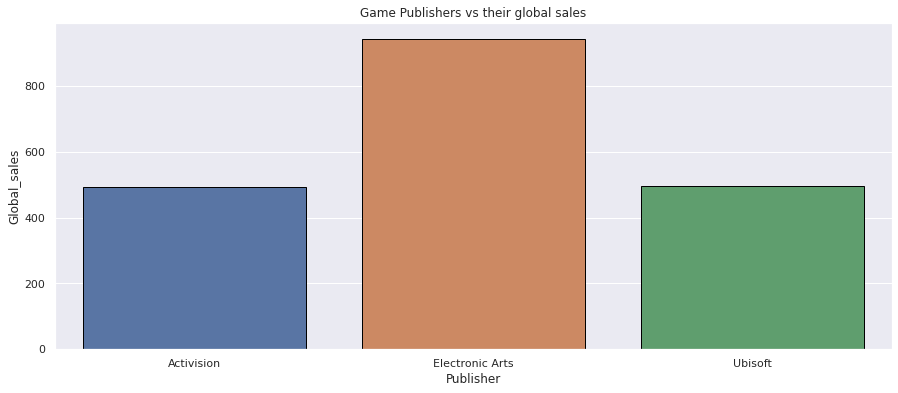

In [ ]:
df = vgs.groupby(['Publisher'], as_index=False)['Global_Sales'].count()
df=df[df['Global_Sales']>400]
plt.figure(figsize=(15,6))
sns.barplot(x='Publisher',data=df,y='Global_Sales',edgecolor="black")
plt.title("Game Publishers vs their global sales")
plt.ylabel("Global_sales")

# Bar plot using matplotlib

* More number of games were developed in the year 2008 and its been decreasing ever since then.

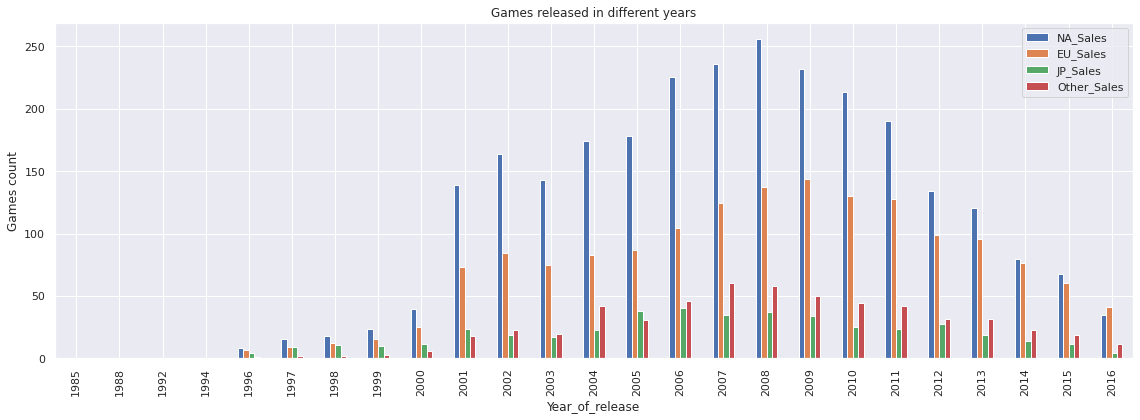

In [ ]:
sales=vgs[['Year_of_release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Year_of_release').sum()
sales.index=sales.index.astype(int)
sales.plot.bar(figsize=(16,6))
plt.title("Games released in different years")
plt.ylabel("Games count")
plt.tight_layout()
plt.show()

#Boxplot using seaborn

* M (Mature 17+) games were sold more globally.

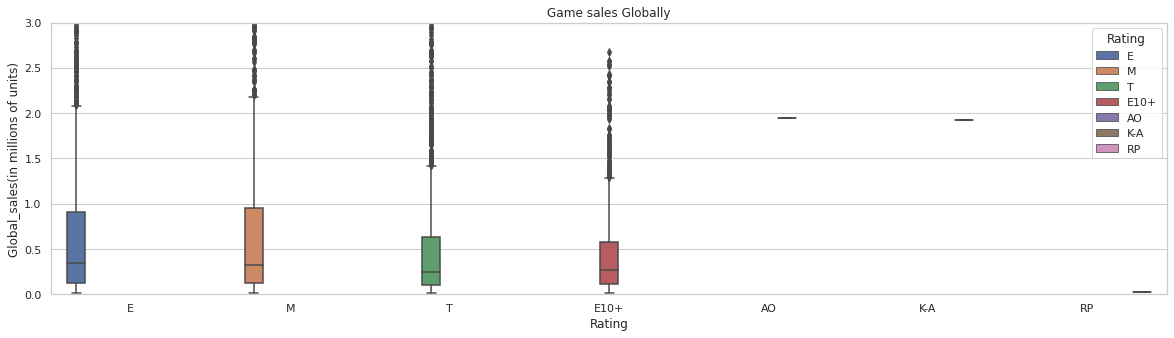

In [ ]:
sns.set_style("whitegrid") 
f, ax = plt.subplots(figsize=(20,5))   
sns.boxplot(x = 'Rating', y = 'Global_Sales', data = vgs,hue='Rating').set_title("Game sales Globally")
plt.ylabel("Global_sales(in millions of units)")
plt.ylim((0,3))
plt.show()

# Line chart using matplotlib

* compared the sales in North America, Japan and Europe for most popular games 

* Looks like Wii Sports was the most popular game.

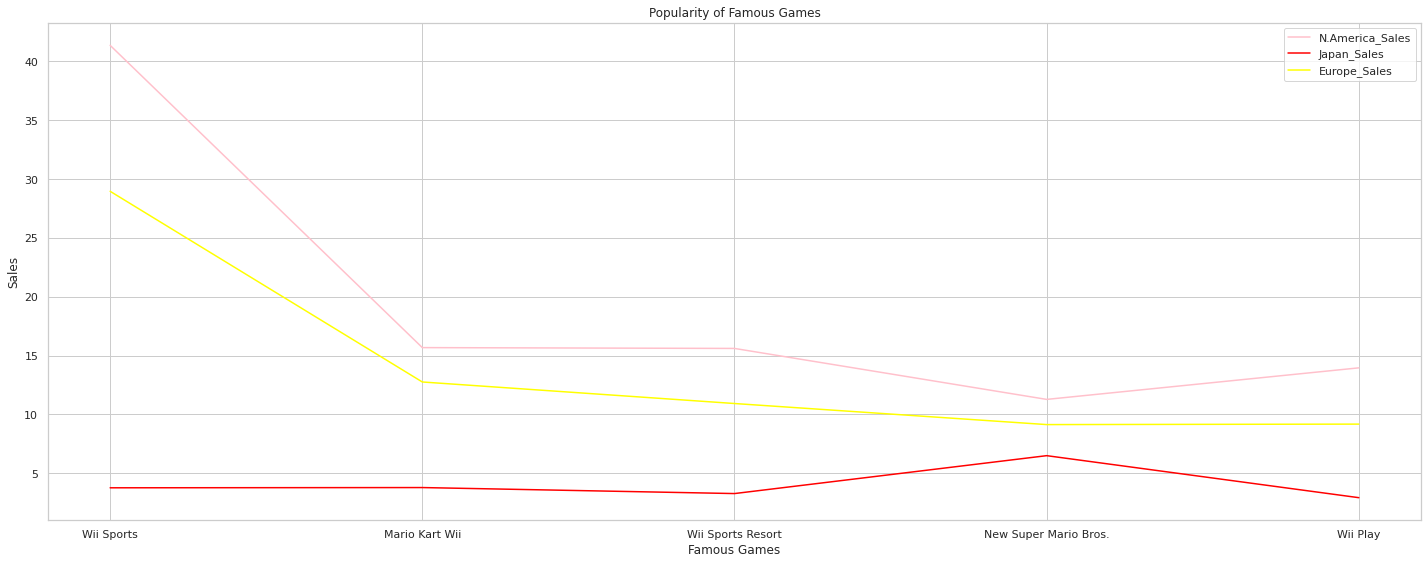

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(vgs['Name'].head(), vgs['NA_Sales'].head(), color='pink', label='N.America_Sales')
plt.plot(vgs['Name'].head(), vgs['JP_Sales'].head(), color ='red', label='Japan_Sales')
plt.plot(vgs['Name'].head(), vgs['EU_Sales'].head(), color='yellow', label='Europe_Sales')
plt.xlabel('Famous Games')
plt.ylabel('Sales')
plt.title('Popularity of Famous Games')
plt.tight_layout()
plt.legend()



# Pairplot

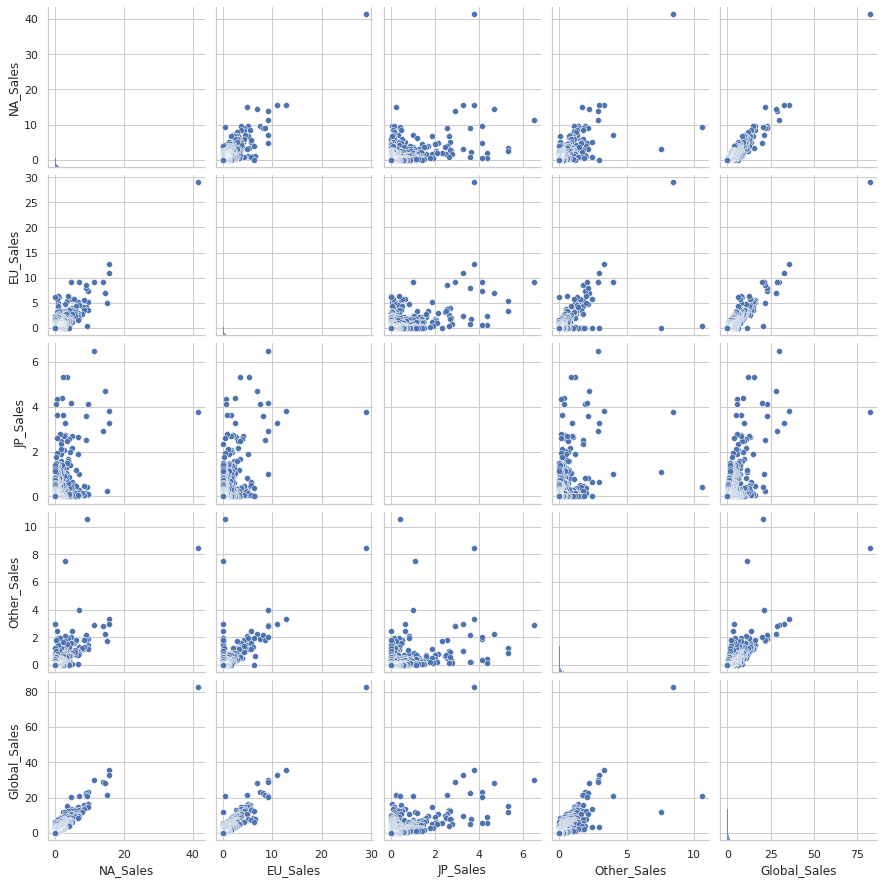

In [ ]:
x = vgs[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
sns.pairplot(x)

**What follow-up analyses might you be able to execute?**

*  First i will make sure that my data looks proper and readable. By looking at the data i got to know that there are many Null values in the dataset that needs to be cleaned.

*   There are some unnecessary data which are not useful for my analysis. so, i will drop those columns using drop function.

* I think i can find the correlation between North America sales, European sales, Japan sales and other sales and can find whether the relationship between them is positive,negative or has no relation.

**How would you do it?**

* I have done some statistical analysis and data visualizations like count plot, barplot, boxplot and line plot to represent my analysis.

Few findings:

* Electronic Arts publishes more games than any other publishers. The games published by them are too high that may be none of the other publishers can reach them.

* Wii sports was the best selling game on Wii platform with nearly 83 million sales.

* Basically, ESRB ratings provide information about the game and categorize according to the age group. Here, it looks like developers are more focused on teenager games.

* Even though, more games were developed for teenagers, M(Mature 17+) games has highest number of sales globally.

* Wii console is developed by Nintendo and most of the games were running on it.

**What would you do with the results?**

* Game sales peaked in 2008 and has been decreasing ever since. However, data is not a representation of overall gaming scene.

* Electronic Arts, Ubisoft and Activision are the few companies that can manage to survive if they maintain the same standards.

* Action games were one of the most popular genre. These games include lots of challenges and the appeal of the action games is that they are intuitive to get into. May be that's the reason why action games are more popular. If they maintain the same levels they can survive in the market.

* It is better to develop more games for age 17+ than developing for teenagers. Because "M" rating games were sold more globally.

* By calculating the Pearson correlation coefficient i can see that North America sales and European sales has strong positive correlation. when the sales of North America was increasing then the sales of Europe was also increasing.






